# Metal on metal surface diffusion

- nothing moves
    - also, adatoms enter the surface
    - could be the temperature
    - could be the wrong termination

- file names are ambiguous

    - all inputs are called input.txt
    - msd files as well

- MEAM are significantly slower

# Cu

In [1]:
%%writefile input.txt
### Simulating adatoms ###
### Version 0.3 ###

units metal
dimension 3
boundary p p s
atom_style atomic

lattice fcc 3.614
variable cubel equal 4
variable fixer1 equal "v_cubel+2"
variable fixer2 equal "v_cubel+1.49"

region box block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 1 units lattice
region cbox block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 0 units lattice
create_box 1 box
create_atoms 1 region cbox
create_atoms 1 single -0.5 0 0.5 units lattice

# Define regions and groups
region hold block INF INF INF INF -${fixer1} -${fixer2} units lattice
region temp block INF INF INF INF -${fixer2} -${cubel} units lattice
group hold region hold
group temp region temp

# Define adatom group by position
region adatom block -1 -0.1 -0.1 0.1 0.4 0.6 units lattice
group adatom region adatom

pair_style eam/alloy
pair_coeff * * Cu01.eam.alloy Cu

timestep        0.005
compute         new all temp
velocity        temp create 600 12345
fix heater temp temp/rescale 1 850 850 5 1
fix nve all nve
fix freeze hold setforce 0 0 0

# MSD tracking
compute msd_adatom adatom msd
fix msdout all ave/time 10 100 1000 c_msd_adatom[4] file msd_Cu.txt

# Energy logging
variable e     equal pe
variable k     equal ke
variable t     equal etotal
variable T     equal temp
fix energy all ave/time 1 50 50 v_k v_e v_t v_T file energy_avg.txt

minimize 1.0e-4 1.0e-6 1000 10000

# Dump every 1000 steps
dump eve all custom 1000 dump.Cu.lammpstrj id type xu yu zu
dump_modify eve sort id

thermo 50
run 50000

Overwriting input.txt


In [2]:
!mpirun -np 8 lmp_mpi < input.txt

LAMMPS (29 Aug 2024 - Update 2)
Lattice spacing in x,y,z = 3.614 3.614 3.614
Created orthogonal box = (-14.456 -14.456 -21.684) to (14.456 14.456 3.614)
  2 by 2 by 2 MPI processor grid
Created 1664 atoms
  using lattice units in orthogonal box = (-14.456 -14.456 -21.68653) to (14.456 14.456 3.6165298)
  create_atoms CPU = 0.002 seconds
Created 1 atoms
  using lattice units in orthogonal box = (-14.456 -14.456 -21.68653) to (14.456 14.456 3.6165298)
  create_atoms CPU = 0.002 seconds
256 atoms in group hold
384 atoms in group temp
1 atoms in group adatom
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.506786
  ghost atom cutoff = 7.506786
  binsize = 3.753393, bins = 8 8 7
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: stand

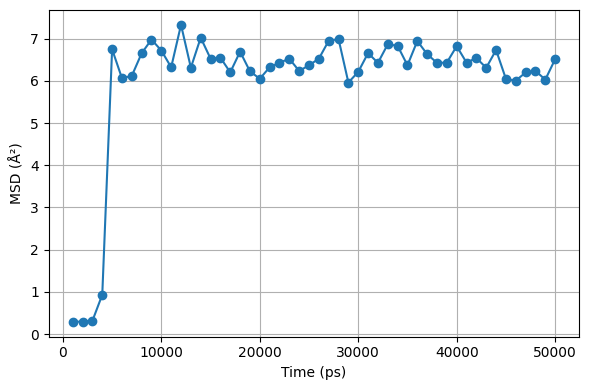

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load MSD data
# Skip the LAMMPS comment line at the top (starts with "#")
df = pd.read_csv("msd_adatom.txt", sep="\s+", comment="#", header=None, names=["time", "msd"])

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df["time"], df["msd"], marker='o', linestyle='-')
plt.xlabel("Time (ps)")
plt.ylabel("MSD (Å²)")
#plt.title("Mean Squared Displacement of Ag Adatom on Au(100)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pt

In [93]:
%%writefile input.txt
### Simulating adatoms ###
### Version 0.3 ###

units metal
dimension 3
boundary p p s
atom_style atomic

lattice fcc 3.96
variable cubel equal 4
variable fixer1 equal "v_cubel+2"
variable fixer2 equal "v_cubel+1.49"

region box block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 1 units lattice
region cbox block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 0 units lattice
create_box 1 box
create_atoms 1 region cbox
create_atoms 1 single -0.5 0 0.5 units lattice

# Define regions and groups
region hold block INF INF INF INF -${fixer1} -${fixer2} units lattice
region temp block INF INF INF INF -${fixer2} -${cubel} units lattice
group hold region hold
group temp region temp

# Define adatom group by position
region adatom block -1 -0.1 -0.1 0.1 0.4 0.6 units lattice
group adatom region adatom

pair_style eam/alloy
pair_coeff * * Pt_Zhou04.eam.alloy Pt

timestep        0.005
compute         new all temp
velocity        temp create 600 12345
fix heater temp temp/rescale 1 850 850 5 1
fix nve all nve
fix freeze hold setforce 0 0 0

# MSD tracking
compute msd_adatom adatom msd
fix msdout all ave/time 10 100 1000 c_msd_adatom[4] file msd_adatom.txt

# Energy logging
variable e     equal pe
variable k     equal ke
variable t     equal etotal
variable T     equal temp
fix energy all ave/time 1 50 50 v_k v_e v_t v_T file energy_avg.txt

minimize 1.0e-4 1.0e-6 1000 10000

# Dump every 1000 steps
dump eve all custom 1000 dump.Pt.lammpstrj id type xu yu zu
dump_modify eve sort id

thermo 50
run 50000

Overwriting input.txt


In [95]:
!mpirun -np 8 lmp_mpi < input.txt

LAMMPS (29 Aug 2024 - Update 2)
Lattice spacing in x,y,z = 3.96 3.96 3.96
Created orthogonal box = (-15.84 -15.84 -23.76) to (15.84 15.84 3.96)
  2 by 2 by 2 MPI processor grid
Created 1664 atoms
  using lattice units in orthogonal box = (-15.84 -15.84 -23.762772) to (15.84 15.84 3.962772)
  create_atoms CPU = 0.000 seconds
Created 1 atoms
  using lattice units in orthogonal box = (-15.84 -15.84 -23.762772) to (15.84 15.84 3.962772)
  create_atoms CPU = 0.005 seconds
256 atoms in group hold
384 atoms in group temp
1 atoms in group adatom
Reading eam/alloy potential file Pt_Zhou04.eam.alloy with DATE: 2018-03-30
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 8.1981926
  ghost atom cutoff = 8.1981926
  binsize = 4.0990963, bins = 8 8 7
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bi

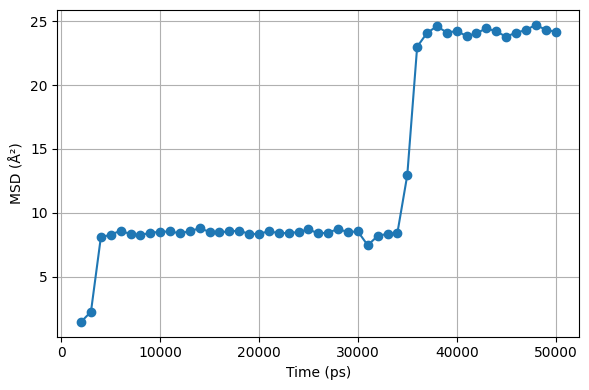

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load MSD data
# Skip the LAMMPS comment line at the top (starts with "#")
df = pd.read_csv("msd_adatom.txt", sep="\s+", comment="#", header=None, names=["time", "msd"])

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df["time"], df["msd"], marker='o', linestyle='-')
plt.xlabel("Time (ps)")
plt.ylabel("MSD (Å²)")
#plt.title("Mean Squared Displacement of Ag Adatom on Au(100)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Au

In [10]:
%%writefile input.txt
units metal
dimension 3
boundary p p s
atom_style atomic

lattice fcc 4.08
variable cubel equal 4
variable fixer1 equal "v_cubel+2"
variable fixer2 equal "v_cubel+1.49"

region box block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 1 units lattice
region cbox block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 0 units lattice
create_box 1 box
create_atoms 1 region cbox
create_atoms 1 single -0.5 0 0.5 units lattice

# Define regions and groups
region hold block INF INF INF INF -${fixer1} -${fixer2} units lattice
region temp block INF INF INF INF -${fixer2} -${cubel} units lattice
group hold region hold
group temp region temp

# Define adatom group by position
region adatom block -1 -0.1 -0.1 0.1 0.4 0.6 units lattice
group adatom region adatom

pair_style eam
pair_coeff * * Au_u3.eam

timestep        0.005
compute         new all temp
velocity        temp create 300 12345
fix heater temp temp/rescale 1 850 850 5 1
fix nve all nve
fix freeze hold setforce 0 0 0

# MSD tracking
compute msd_adatom adatom msd
fix msdout all ave/time 10 100 1000 c_msd_adatom[4] file msd_adatom.txt

# Energy logging
variable e     equal pe
variable k     equal ke
variable t     equal etotal
variable T     equal temp
fix energy all ave/time 1 50 50 v_k v_e v_t v_T file energy_avg.txt

minimize 1.0e-4 1.0e-6 1000 10000

# Dump every 1000 steps
dump eve all custom 1000 dump.Au.lammpstrj id type xu yu zu
dump_modify eve sort id

thermo 50
run 50000

Overwriting input.txt


In [11]:
!mpirun -np 8 lmp_mpi < input.txt

LAMMPS (29 Aug 2024 - Update 2)
Lattice spacing in x,y,z = 4.08 4.08 4.08
Created orthogonal box = (-16.32 -16.32 -24.48) to (16.32 16.32 4.08)
  2 by 2 by 2 MPI processor grid
Created 1664 atoms
  using lattice units in orthogonal box = (-16.32 -16.32 -24.482856) to (16.32 16.32 4.082856)
  create_atoms CPU = 0.004 seconds
Created 1 atoms
  using lattice units in orthogonal box = (-16.32 -16.32 -24.482856) to (16.32 16.32 4.082856)
  create_atoms CPU = 0.002 seconds
256 atoms in group hold
384 atoms in group temp
1 atoms in group adatom
Reading eam potential file Au_u3.eam with DATE: 2007-06-11
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.55
  ghost atom cutoff = 7.55
  binsize = 3.775, bins = 9 9 8
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: hal

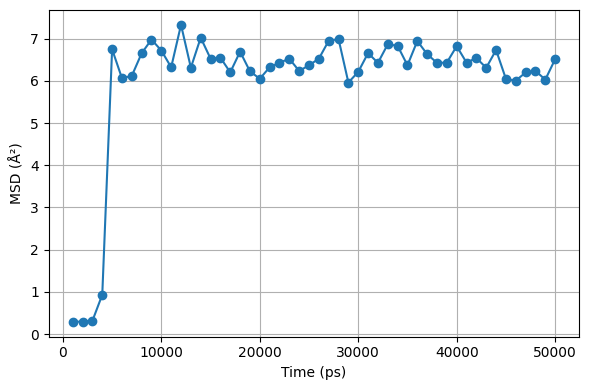

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load MSD data
# Skip the LAMMPS comment line at the top (starts with "#")
df = pd.read_csv("msd_adatom.txt", sep="\s+", comment="#", header=None, names=["time", "msd"])

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df["time"], df["msd"], marker='o', linestyle='-')
plt.xlabel("Time (ps)")
plt.ylabel("MSD (Å²)")
#plt.title("Mean Squared Displacement of Ag Adatom on Au(100)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pt@Cu

In [6]:
%%writefile input.txt
# Pt adatom diffusing on Cu substrate using MEAM

units metal
dimension 3
boundary p p s
atom_style atomic

lattice fcc 3.614
variable cubel equal 4
variable fixer1 equal "v_cubel+2"
variable fixer2 equal "v_cubel+1.49"

# Simulation box
region box block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 1 units lattice
region cbox block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 0 units lattice
create_box 2 box                                  # 2 atom types: 1=Cu, 2=Pt
create_atoms 1 region cbox                        # Cu substrate (type 1)
create_atoms 2 single -0.5 0 0.5 units lattice     # Pt adatom (type 2)

# Region and group definitions
region hold block INF INF INF INF -${fixer1} -${fixer2} units lattice
region temp block INF INF INF INF -${fixer2} -${cubel} units lattice
group hold region hold
group temp region temp
region adatom block -1 -0.1 -0.1 0.1 0.4 0.6 units lattice
group adatom region adatom

# MEAM potential setup
pair_style meam
pair_coeff * * library.meam Cu Pt Cu-Pt.meam Cu Pt

# Masses (not required but good practice)
mass 1 63.546    # Cu
mass 2 195.085   # Pt

# Time integration and thermostat
timestep 0.005
compute new all temp
velocity temp create 600 12345
fix heater temp temp/rescale 1 850 850 5 1
fix nve all nve
fix freeze hold setforce 0 0 0

# MSD tracking for adatom
compute msd_adatom adatom msd
fix msdout all ave/time 10 100 1000 c_msd_adatom[4] file msd_adatom.txt

# Energy logging
variable e equal pe
variable k equal ke
variable t equal etotal
variable T equal temp
fix energy all ave/time 1 50 50 v_k v_e v_t v_T file energy_avg.txt

# Minimization (optional)
minimize 1.0e-4 1.0e-6 1000 10000

# Dump settings
dump eve all custom 1000 dump.PtCu.lammpstrj id type xu yu zu
dump_modify eve sort id

thermo 50
run 50000

Overwriting input.txt


In [7]:
!mpirun -np 8 lmp_mpi < input.txt

LAMMPS (29 Aug 2024 - Update 2)
Lattice spacing in x,y,z = 3.614 3.614 3.614
Created orthogonal box = (-14.456 -14.456 -21.684) to (14.456 14.456 3.614)
  2 by 2 by 2 MPI processor grid
Created 1664 atoms
  using lattice units in orthogonal box = (-14.456 -14.456 -21.68653) to (14.456 14.456 3.6165298)
  create_atoms CPU = 0.001 seconds
Created 1 atoms
  using lattice units in orthogonal box = (-14.456 -14.456 -21.68653) to (14.456 14.456 3.6165298)
  create_atoms CPU = 0.001 seconds
256 atoms in group hold
384 atoms in group temp
1 atoms in group adatom
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 6.5
  ghost atom cutoff = 6.5
  binsize = 3.25, bins = 9 9 8
  2 neighbor lists, perpetual/occasional/extra = 2 0 0
  (1) pair meam, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
  (2) pair meam, perpe

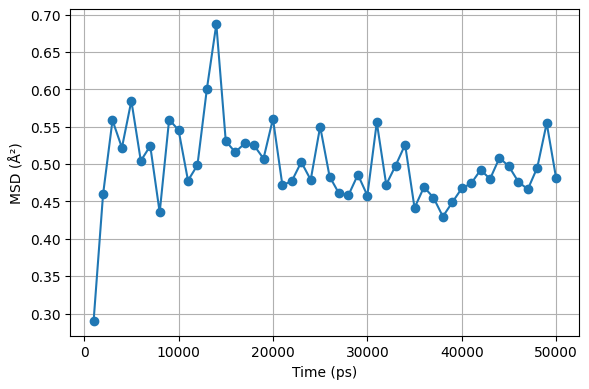

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load MSD data
# Skip the LAMMPS comment line at the top (starts with "#")
df = pd.read_csv("msd_adatom.txt", sep="\s+", comment="#", header=None, names=["time", "msd"])

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df["time"], df["msd"], marker='o', linestyle='-')
plt.xlabel("Time (ps)")
plt.ylabel("MSD (Å²)")
#plt.title("Mean Squared Displacement of Ag Adatom on Au(100)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Cu @ Pt

In [9]:
%%writefile input.txt
# Cu adatom diffusing on Pt substrate using MEAM

units metal
dimension 3
boundary p p s
atom_style atomic

lattice fcc 3.924   # Cu lattice
variable cubel equal 4
variable fixer1 equal "v_cubel+2"
variable fixer2 equal "v_cubel+1.49"

region box block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 1 units lattice
region cbox block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 0 units lattice
create_box 2 box                                  # 2 atom types: 1=Pt, 2=Cu
create_atoms 1 region cbox                        # Pt substrate
create_atoms 2 single -0.5 0 0.5 units lattice     # Cu adatom

# Define regions and groups
region hold block INF INF INF INF -${fixer1} -${fixer2} units lattice
region temp block INF INF INF INF -${fixer2} -${cubel} units lattice
group hold region hold
group temp region temp
region adatom block -1 -0.1 -0.1 0.1 0.4 0.6 units lattice
group adatom region adatom

# MEAM potential setup
pair_style meam
pair_coeff * * library.meam Pt Cu Cu-Pt.meam Pt Cu

# Note the order: Pt is type 1, Cu is type 2 → must match the mapping in pair_coeff

mass 1 195.085   # Pt
mass 2 63.546    # Cu

# Thermostat and integration
timestep 0.005
compute new all temp
velocity temp create 600 12345
fix heater temp temp/rescale 1 850 850 5 1
fix nve all nve
fix freeze hold setforce 0 0 0

# MSD tracking
compute msd_adatom adatom msd
fix msdout all ave/time 10 100 1000 c_msd_adatom[4] file msd_adatom.txt

# Energy logging
variable e equal pe
variable k equal ke
variable t equal etotal
variable T equal temp
fix energy all ave/time 1 50 50 v_k v_e v_t v_T file energy_avg.txt

# Minimization
minimize 1.0e-4 1.0e-6 1000 10000

# Dump
dump eve all custom 1000 dump.CuPt.lammpstrj id type xu yu zu
dump_modify eve sort id

thermo 50
run 50000

Overwriting input.txt


In [46]:
!mpirun -np 8 lmp_mpi < input.txt

LAMMPS (29 Aug 2024 - Update 2)
Lattice spacing in x,y,z = 3.924 3.924 3.924
Created orthogonal box = (-15.696 -15.696 -23.544) to (15.696 15.696 3.924)
  2 by 2 by 2 MPI processor grid
Created 1664 atoms
  using lattice units in orthogonal box = (-15.696 -15.696 -23.546747) to (15.696 15.696 3.9267468)
  create_atoms CPU = 0.001 seconds
Created 1 atoms
  using lattice units in orthogonal box = (-15.696 -15.696 -23.546747) to (15.696 15.696 3.9267468)
  create_atoms CPU = 0.001 seconds
256 atoms in group hold
384 atoms in group temp
1 atoms in group adatom
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 6.5
  ghost atom cutoff = 6.5
  binsize = 3.25, bins = 10 10 9
  2 neighbor lists, perpetual/occasional/extra = 2 0 0
  (1) pair meam, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
  (2) pair meam, p

# Ag @ Au

In [91]:
%%writefile input.txt
# Ag adatom diffusing on Au substrate using MEAM

units metal
dimension 3
boundary p p s
atom_style atomic

lattice fcc 4   # Au lattice
variable cubel equal 4
variable fixer1 equal "v_cubel+2"
variable fixer2 equal "v_cubel+1.49"

region box block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 1 units lattice
region cbox block -${cubel} ${cubel} -${cubel} ${cubel} -${fixer1} 0 units lattice
create_box 2 box                                  # 2 atom types: 1=Au, 2=Ag
create_atoms 1 region cbox                        # Au substrate
create_atoms 2 single -0.5 0 0.5 units lattice     # Ag adatom

# Define regions and groups
region hold block INF INF INF INF -${fixer1} -${fixer2} units lattice
region temp block INF INF INF INF -${fixer2} -${cubel} units lattice
group hold region hold
group temp region temp
region adatom block -1 -0.1 -0.1 0.1 0.4 0.6 units lattice
group adatom region adatom

# MEAM potential setup
pair_style meam
pair_coeff * * AgAu.library.meam Au Ag AgAu.parameter.meam Au Ag

# Note the order: Au is type 1, Ag is type 2 → must match the mapping in pair_coeff

mass 1 196.967   # Au
mass 2 107.868   # Ag

# Thermostat and integration
timestep 0.005
compute new all temp
velocity temp create 300 12345
fix thermostat temp nvt temp 300 300 0.1
fix nve all nve
fix freeze hold setforce 0 0 0

# MSD tracking
compute msd_adatom adatom msd
fix msdout all ave/time 10 100 1000 c_msd_adatom[4] file msd_adatom.txt

# Energy logging
variable e equal pe
variable k equal ke
variable t equal etotal
variable T equal temp
fix energy all ave/time 1 50 50 v_k v_e v_t v_T file energy_avg.txt

# Minimization
minimize 1.0e-4 1.0e-6 1000 10000

# Dump
dump eve all custom 1000 dump.AgAu.lammpstrj id type xu yu zu
dump_modify eve sort id

thermo 50
run 50000

Overwriting input.txt


In [92]:
!mpirun -np 8 lmp_mpi < input.txt

LAMMPS (29 Aug 2024 - Update 2)
Lattice spacing in x,y,z = 4 4 4
Created orthogonal box = (-16 -16 -24) to (16 16 4)
  2 by 2 by 2 MPI processor grid
Created 1664 atoms
  using lattice units in orthogonal box = (-16 -16 -24.0028) to (16 16 4.0028)
  create_atoms CPU = 0.001 seconds
Created 1 atoms
  using lattice units in orthogonal box = (-16 -16 -24.0028) to (16 16 4.0028)
  create_atoms CPU = 0.001 seconds
256 atoms in group hold
384 atoms in group temp
1 atoms in group adatom
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7
  ghost atom cutoff = 7
  binsize = 3.5, bins = 10 10 9
  2 neighbor lists, perpetual/occasional/extra = 2 0 0
  (1) pair meam, perpetual
      attributes: full, newton on
      pair build: full/bin/atomonly
      stencil: full/bin/3d
      bin: standard
  (2) pair meam, perpetual, half/full from (1)
      attributes: half, newton on
      pair build: ha

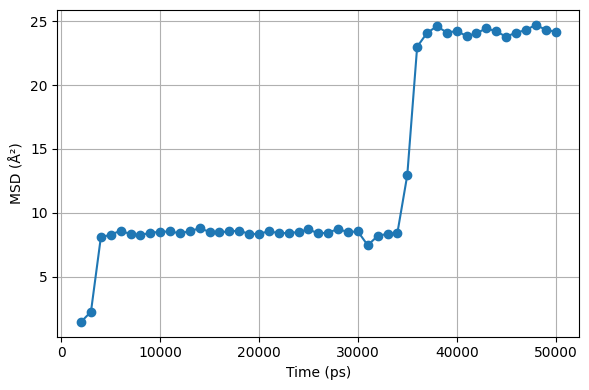

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load MSD data
# Skip the LAMMPS comment line at the top (starts with "#")
df = pd.read_csv("msd_adatom.txt", sep="\s+", comment="#", header=None, names=["time", "msd"])

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df["time"], df["msd"], marker='o', linestyle='-')
plt.xlabel("Time (ps)")
plt.ylabel("MSD (Å²)")
#plt.title("Mean Squared Displacement of Ag Adatom on Au(100)")
plt.grid(True)
plt.tight_layout()
plt.show()